In [102]:
import random
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tqdm.auto import tqdm
from sklearn.preprocessing import LabelEncoder

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader

from sklearn.preprocessing import StandardScaler

from numba import cuda
import os

In [88]:
brand_keyword = pd.read_csv("./brand_keyword_cnt.csv")
product_info = pd.read_csv("./product_info.csv")
sales = pd.read_csv("./sales.csv")
train = pd.read_csv("./train.csv")
baseline_submit = pd.read_csv("./baseline_submit.csv")

train.drop(['ID'], axis=1, inplace=True)

In [104]:
train_scaler = StandardScaler()
brand_keyword_scaler = StandardScaler()
train.iloc[:, 5:] = train_scaler.fit_transform(train.iloc[:, 5:])
brand_keyword.iloc[:, 1:] = brand_keyword_scaler.fit_transform(brand_keyword.iloc[:, 1:])

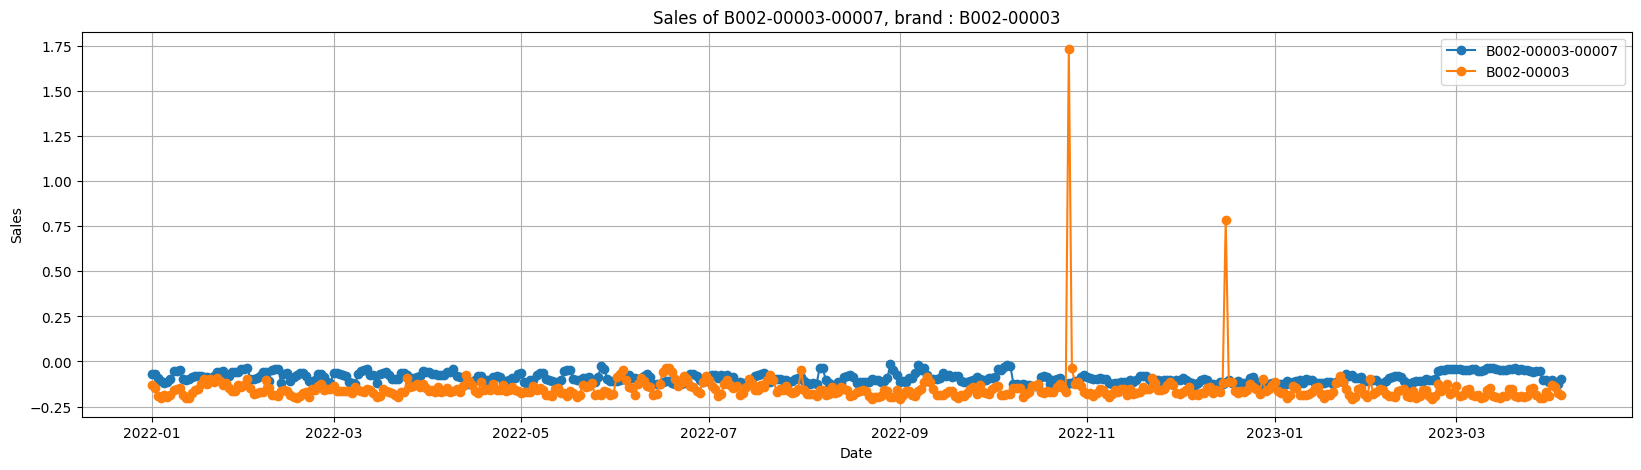

In [108]:
# 제품과 브랜드에 대한 정보 선택
product_id = train['제품'][10]
brand_id = train[train['제품'] == product_id]['브랜드'].iloc[0]

# 제품과 브랜드에 해당하는 판매량 데이터 선택
train_data = train[train['제품'] == product_id].iloc[:, 5:]
brand_keyword_data = brand_keyword[brand_keyword['브랜드'] == brand_id].iloc[:, 1:]

# 날짜 데이터를 datetime 형식으로 변환
train_data.columns = pd.to_datetime(train_data.columns)
brand_keyword_data.columns = pd.to_datetime(brand_keyword_data.columns)

# 차트 출력
plt.figure(figsize=(20, 5))
plt.plot(train_data.columns, train_data.iloc[0], marker='o', label=product_id)
plt.plot(brand_keyword_data.columns, brand_keyword_data.iloc[0], marker='o', label=brand_id)
plt.legend()
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales of {}, brand : {}'.format(product_id, brand_id))
plt.grid()
plt.show()